In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['education']=imputer.fit_transform(data['education'].values.reshape(-1,1))

In [9]:
data.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
imputerr=SimpleImputer(missing_values=np.nan,strategy='median')
data.iloc[:,:-1]=imputerr.fit_transform(data.iloc[:,:-1].values)

/tmp/ipykernel_10959/51375087.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,:-1]=imputerr.fit_transform(data.iloc[:,:-1].values)


In [11]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:ylabel='count'>

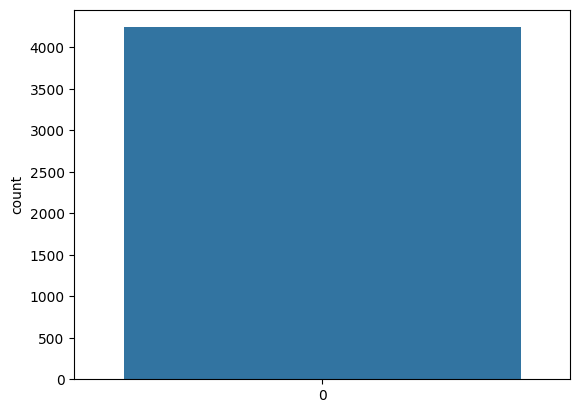

In [13]:
sns.countplot(data['TenYearCHD'])

In [17]:
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [23]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=20)

In [29]:
from imblearn.under_sampling import TomekLinks
from collections import Counter
r1=TomekLinks(sampling_strategy='majority')
print(Counter(train_y))
n_train_x,n_train_y=r1.fit_resample(train_x,train_y)
print(Counter(n_train_y))


Counter({0: 3578, 1: 642})
Counter({0: 3366, 1: 642})


!pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE
print(Counter(train_y))
sm=SMOTE()
n_train_x,n_train_y=sm.fit_resample(train_x,train_y)
print(Counter(n_train_y))


Counter({0: 3578, 1: 642})
Counter({0: 3578, 1: 3578})


In [35]:
from imblearn.combine import SMOTETomek
print(Counter(train_y))
sm=SMOTETomek()
n_train_x,n_train_y=sm.fit_resample(train_x,train_y)
print(Counter(n_train_y))


Counter({0: 3578, 1: 642})
Counter({0: 3548, 1: 3548})
